In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
np.random.seed(10)

In [3]:
fa_stats_v3 = pd.read_excel("../spring21_data/fa_stats_v3.xlsx")
fa_stats_v3 = fa_stats_v3 .sample(frac=1).reset_index(drop=True) ## make sure to shuffle the rows otherwise the cross validation will be scuffed

In [4]:
# fa_stats_v3 = fa_stats_v3[fa_stats_v3["minutes_played"] >= 0]
# fa_stats_v3 = fa_stats_v3[fa_stats_v3["Games"] >= 0]
# fa_stats_v3 = fa_stats_v3[fa_stats_v3["value_over_replacement_player"] >= 0]

In [5]:
df = fa_stats_v3.select_dtypes(exclude=['object'])

In [6]:
df.drop(columns=["Unnamed: 0", "Minutes", "salary", "clean_season", "age", "end season_y", "season_end"], inplace=True)

C:\Users\Rishab\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.columns

Index(['WS', 'Games', 'O-LEBRON', 'D-LEBRON', 'Wins Added', 'MPG', 'ORPM',
       'DRPM', 'poss', 'raptor_offense', 'raptor_defense', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'pace_impact', 'LA_RAPM__Def', 'LA_RAPM__Off',
       'RA_EFG__Def', 'RA_EFG__Off', 'RA_FTR__Def', 'RA_FTR__Off',
       'RA_ORBD__Def', 'RA_ORBD__Off', 'RA_TOV__Def', 'RA_TOV__Off',
       'RAPM__Def', 'RAPM__Off', 'games_played', 'games_started',
       'minutes_played', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_perce

In [8]:
## THE FINAL DATASET
X_v3 = df.drop(columns=["cap_space_usage"])
y_v3 = df[["cap_space_usage"]]
X_v3.to_excel("X_v3.xlsx")
y_v3.to_excel("y_v3.xlsx")

In [25]:
X = X_v3
y = y_v3

In [26]:
import smogn

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
X_test

,WS,Games,O-LEBRON,D-LEBRON,Wins Added,MPG,ORPM,DRPM,poss,raptor_offense,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
78,1.0,51,0.610905,-0.673452,1.111510,14.5,0.44,0.41,1510,-0.866848,...,28.8,15.0,-0.5,0.2,-0.3,-0.051,-6.3,-0.4,-6.8,-0.3
275,2.1,79,-0.126605,-2.744453,-0.949777,32.3,-1.05,-0.81,5177,-0.425277,...,10.2,22.8,1.7,0.4,2.1,0.039,-0.1,-1.5,-1.6,0.2
247,1.0,51,-1.763559,0.209022,0.260816,10.3,-0.92,0.85,1249,-3.010896,...,10.2,16.5,0.5,0.6,1.0,0.094,-2.2,-0.2,-2.4,0.0
55,2.7,61,-1.463410,3.389604,2.065030,12.0,-1.77,1.34,1471,-0.776419,...,19.0,12.8,1.3,1.3,2.7,0.175,-2.0,2.8,0.7,0.5
389,1.1,37,0.334029,-0.545922,0.662465,12.8,0.04,1.67,1079,2.168821,...,16.6,19.0,0.5,0.6,1.1,0.116,-1.1,0.8,-0.3,0.2
203,1.4,55,-1.126560,-0.808598,0.293747,21.9,-3.03,0.25,2661,-1.902704,...,17.8,19.6,-0.1,1.5,1.4,0.054,-2.5,0.2,-2.3,-0.1
42,1.1,29,-0.998181,1.808541,1.326450,21.9,-1.19,0.16,1297,-1.747457,...,25.4,14.2,0.0,1.1,1.1,0.079,-1.5,3.1,1.6,0.6
233,3.8,76,0.928428,-0.128195,3.885353,24.6,0.20,1.95,4174,0.384791,...,17.7,15.9,2.2,1.6,3.8,0.098,-0.7,-0.5,-1.2,0.4
150,7.8,81,0.562133,0.815348,5.770380,28.9,0.99,0.25,5127,2.160647,...,7.1,16.8,4.7,3.2,7.8,0.161,2.1,0.5,2.7,2.7
116,-0.1,18,-0.531061,-0.098062,0.217913,10.8,-1.87,0.40,397,-5.396341,...,11.3,15.8,-0.3,0.2,-0.1,-0.014,-4.7,-0.7,-5.5,-0.2


In [28]:
both = pd.concat([X_train, y_train], axis=1).reset_index().drop(columns=["index"])
smote_data = smogn.smoter(data = both,
                           y = 'cap_space_usage',
                           rel_xtrm_type = 'high',
                           rel_thres = 0.8,
                           samp_method = 'extreme')
sm = smote_data.sample(frac=1).reset_index(drop=True) ## make sure to shuffle the rows otherwise the cross validation will be scuffed
y = sm[['cap_space_usage']]
X = sm.drop(columns=['cap_space_usage'])

r_index: 100%|################################| 31/31 [00:00<00:00, 206.81it/s]


In [29]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=20)

best_features = select.fit_transform(X, y)
feature_scores = pd.concat([pd.Series(X.columns), pd.Series(select.scores_)], axis=1)
feature_scores.columns = ["features", "score"]
features = list(feature_scores.sort_values(by=["score"], ascending=False)['features'])

X = X[features]
print(len(X.columns.values))

66


C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import Normalizer

In [31]:
from sklearn.model_selection import cross_val_score, cross_validate
def performance(model):
    etr = make_pipeline(Normalizer(), model)
    results = cross_validate(etr, X, y, cv=5, scoring="explained_variance", return_estimator=True)
    #print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print(results)
    return results

In [32]:
performance(ExtraTreesRegressor())

C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

{'fit_time': array([0.54906583, 0.58082414, 0.55631638, 0.5438869 , 0.57493234]), 'score_time': array([0.01198292, 0.01090598, 0.01179552, 0.01164341, 0.01153994]), 'estimator': (Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor', ExtraTreesRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor', ExtraTreesRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor', ExtraTreesRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor', ExtraTreesRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor', ExtraTreesRegressor())])), 'test_score': array([0.89849224, 0.86813171, 0.88711949, 0.91317182, 0.88754234])}


{'fit_time': array([0.54906583, 0.58082414, 0.55631638, 0.5438869 , 0.57493234]),
 'score_time': array([0.01198292, 0.01090598, 0.01179552, 0.01164341, 0.01153994]),
 'estimator': (Pipeline(steps=[('normalizer', Normalizer()),
                  ('extratreesregressor', ExtraTreesRegressor())]),
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('extratreesregressor', ExtraTreesRegressor())]),
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('extratreesregressor', ExtraTreesRegressor())]),
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('extratreesregressor', ExtraTreesRegressor())]),
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('extratreesregressor', ExtraTreesRegressor())])),
 'test_score': array([0.89849224, 0.86813171, 0.88711949, 0.91317182, 0.88754234])}

In [33]:
res = performance(ExtraTreesRegressor(max_depth=None, n_estimators=200, min_samples_split=3, min_samples_leaf=2, random_state=42))

C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

{'fit_time': array([0.8117187 , 0.83185816, 0.7598455 , 0.76988673, 0.80311704]), 'score_time': array([0.01775932, 0.01599312, 0.01699233, 0.01698852, 0.0179894 ]), 'estimator': (Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor',
                 ExtraTreesRegressor(min_samples_leaf=2, min_samples_split=3,
                                     n_estimators=200, random_state=42))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor',
                 ExtraTreesRegressor(min_samples_leaf=2, min_samples_split=3,
                                     n_estimators=200, random_state=42))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor',
                 ExtraTreesRegressor(min_samples_leaf=2, min_samples_split=3,
                                     n_estimators=200, random_state=42))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('extratreesregressor',
               

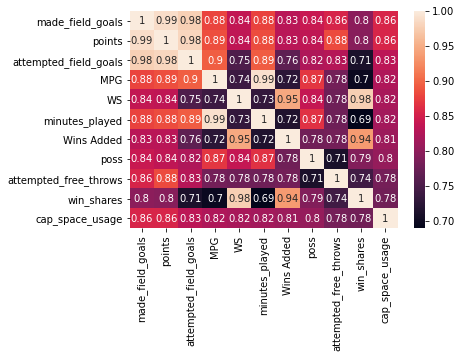

In [34]:
import seaborn as sns
sns.heatmap(pd.concat([X[features[0:10]], y], axis=1).corr(), annot=True)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
res_gbr = performance(GradientBoostingRegressor())

C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Rishab\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

{'fit_time': array([0.59027624, 0.60929966, 0.57187176, 0.60807943, 0.62308407]), 'score_time': array([0.00299788, 0.00384355, 0.00399828, 0.00499678, 0.00399852]), 'estimator': (Pipeline(steps=[('normalizer', Normalizer()),
                ('gradientboostingregressor', GradientBoostingRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('gradientboostingregressor', GradientBoostingRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('gradientboostingregressor', GradientBoostingRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('gradientboostingregressor', GradientBoostingRegressor())]), Pipeline(steps=[('normalizer', Normalizer()),
                ('gradientboostingregressor', GradientBoostingRegressor())])), 'test_score': array([0.89016902, 0.85591252, 0.85116803, 0.910952  , 0.84742297])}


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error
def evaluate(y_pred, y_test):
    """ Prints out the evaluation metrics of the experiment
        parameters:
            y_pred
                DataFrame or array-like, the predictions
            y_test
                DataFrame or array-like, the actual y-values
                
            these two parameters must have the same dimensions
    """
    print("r^2: ", r2_score(y_test, y_pred))
    print("mse: ", mean_squared_error(y_test, y_pred))
    print("variance_score: ", explained_variance_score(y_test, y_pred))
    print("mse-log: ", mean_squared_log_error(y_test, y_pred))

In [37]:
[col for col in X_test.columns.values if col not in X.columns.values]

[]

In [38]:
X_test = X_test[X.columns.values]

In [44]:
estimator = res['estimator'][4]
evaluate(estimator.predict(X_test), y_test)

r^2:  0.27642855728680527
mse:  0.0017844434124003976
variance_score:  0.3127201593268293
mse-log:  0.0014861758473686106


In [40]:
estimator = res_gbr['estimator'][3]
evaluate(estimator.predict(X_test), y_test)

r^2:  0.12843959420256468
mse:  0.002149407968344478
variance_score:  0.13755518563435853
mse-log:  0.0017931009645635872
